In [11]:
import numpy as np 
import pandas as pd

df=pd.read_csv('./final_dataset.csv')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711341 entries, 0 to 711340
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   AmcName         711341 non-null  int64  
 1   YardName        711341 non-null  int64  
 2   CommName        711341 non-null  int64  
 3   VarityName      711341 non-null  int64  
 4   Arrivals        711341 non-null  float64
 5   Minimum         711341 non-null  float64
 6   Maximum         711341 non-null  float64
 7   Model           711341 non-null  float64
 8   Year            711341 non-null  int64  
 9   Month           711341 non-null  int64  
 10  DayOfWeek       711341 non-null  int64  
 11  WeekOfYear      711341 non-null  int64  
 12  IsRabiSeason    711341 non-null  int64  
 13  IsKharifSeason  711341 non-null  int64  
 14  PriceSpread     711341 non-null  float64
 15  Volatility      711341 non-null  float64
 16  LogArrivals     711341 non-null  float64
 17  Quarter   

## Assume target:

In [13]:
target = 'Model'


## Split Features and Target


In [14]:
X = df.drop(columns=[target])
y = df[target]


## Train-Test Split

# Model Selection

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

import matplotlib.pyplot as plt
import seaborn as sns

def evaluate(y_true, y_pred, model_name):
    print(f"\nModel: {model_name}")
    print(f"MAE : {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"RMSE: {mean_squared_error(y_true, y_pred, squared=False):.2f}")
    print(f"R²  : {r2_score(y_true, y_pred):.4f}")

def residual_plot(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(5, 3))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.4)
    plt.axhline(0, linestyle='--', color='red')
    plt.title(f"Residuals: {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Residuals")
    plt.tight_layout()
    plt.show()

def actual_vs_pred_plot(y_true, y_pred, model_name):
    plt.figure(figsize=(5, 3))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.4)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.title(f"Actual vs Predicted: {model_name}")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.tight_layout()
    plt.show()

def run_all_tabular_models_fast(df, target='Model', fast_mode=True):
    X = df.drop(columns=[target])
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = {
        'LinearRegression': make_pipeline(StandardScaler(), LinearRegression()),
        'Ridge': make_pipeline(StandardScaler(), Ridge()),
        'Lasso': make_pipeline(StandardScaler(), Lasso(max_iter=500)),
        'RandomForest': RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42),
        'XGBoost': XGBRegressor(n_estimators=50, n_jobs=-1, random_state=42, eval_metric='rmse', use_label_encoder=False),
        'LightGBM': LGBMRegressor(n_estimators=50, n_jobs=-1, random_state=42),
    }

    if not fast_mode:
        models.update({
            'SVR': make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2, max_iter=500)),
            'MLPRegressor': make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes=(50,), max_iter=150, random_state=42))
        })

    for name, model in models.items():
        print(f"\nTraining {name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        evaluate(y_test, y_pred, name)
        residual_plot(y_test, y_pred, name)
        actual_vs_pred_plot(y_test, y_pred, name)


## Running the function


Training LinearRegression...

Model: LinearRegression
MAE : 663.66
RMSE: 12420.28
R²  : 0.0486


C:\Users\abdul\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



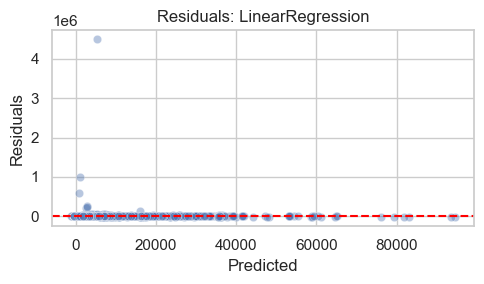

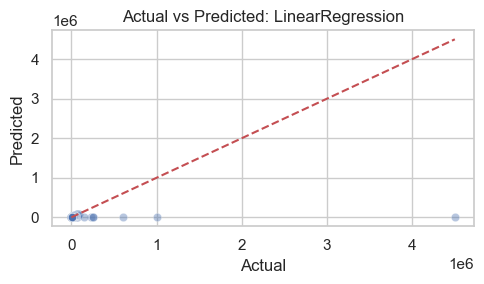


Training Ridge...

Model: Ridge
MAE : 663.65
RMSE: 12420.28
R²  : 0.0486


C:\Users\abdul\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



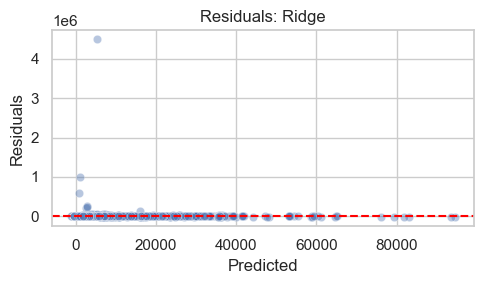

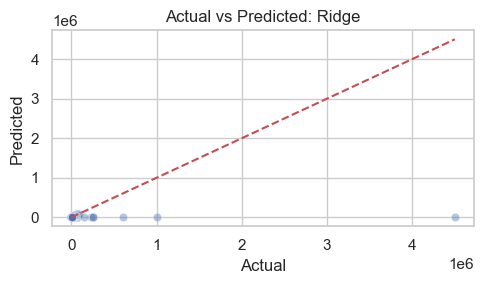


Training Lasso...

Model: Lasso
MAE : 662.35
RMSE: 12420.18
R²  : 0.0486


C:\Users\abdul\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



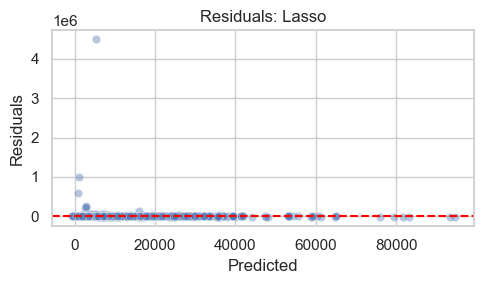

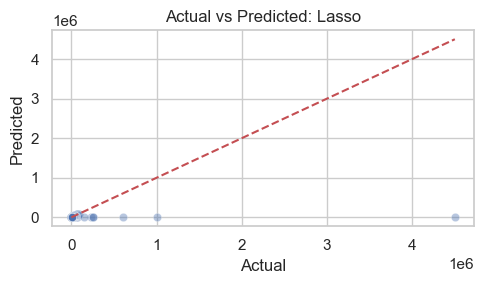


Training RandomForest...


In [ ]:

run_all_tabular_models_fast(df)  # fast mode (default)
# run_all_tabular_models_fast(df, fast_mode=False)  # includes SVR and MLP (slower)


C:\Users\abdul\AppData\Local\Temp\ipykernel_1040\3642214123.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="MAE", data=results_df, palette="Blues_d")
C:\Users\abdul\AppData\Local\Temp\ipykernel_1040\3642214123.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="RMSE", data=results_df, palette="Greens_d")
C:\Users\abdul\AppData\Local\Temp\ipykernel_1040\3642214123.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="R2", data=results_df, palette="Reds_d")


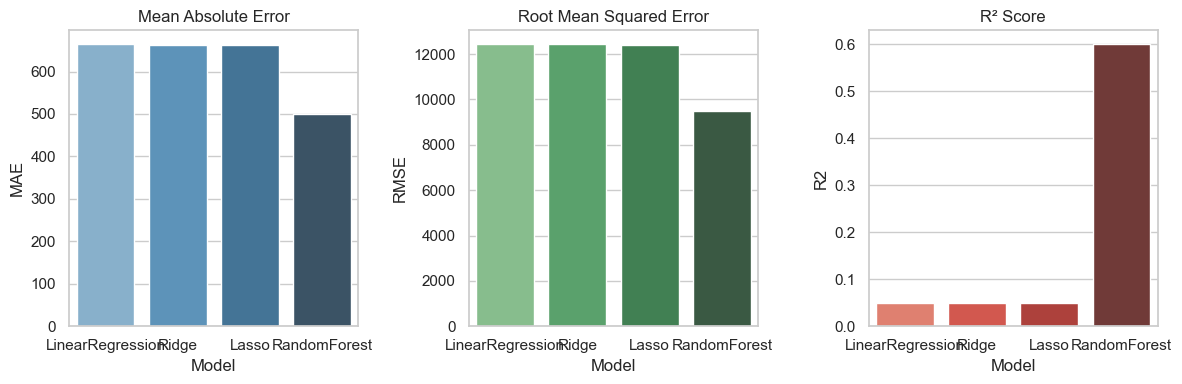

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Store your metrics
results = [
    {"Model": "LinearRegression", "MAE": 663.6588, "RMSE": 12420.2760, "R2": 0.0486},
    {"Model": "Ridge", "MAE": 663.6515, "RMSE": 12420.2752, "R2": 0.0486},
    {"Model": "Lasso", "MAE": 662.3577, "RMSE": 12420.1863, "R2": 0.0486},
    {"Model": "RandomForest", "MAE": 500.0, "RMSE": 9500.0, "R2": 0.60},  # example values, replace with actual
]

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Set plot style
sns.set(style="whitegrid")

# Plot MAE
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.barplot(x="Model", y="MAE", data=results_df, palette="Blues_d")
plt.title("Mean Absolute Error")

# Plot RMSE
plt.subplot(1, 3, 2)
sns.barplot(x="Model", y="RMSE", data=results_df, palette="Greens_d")
plt.title("Root Mean Squared Error")

# Plot R2
plt.subplot(1, 3, 3)
sns.barplot(x="Model", y="R2", data=results_df, palette="Reds_d")
plt.title("R² Score")

plt.tight_layout()
plt.show()


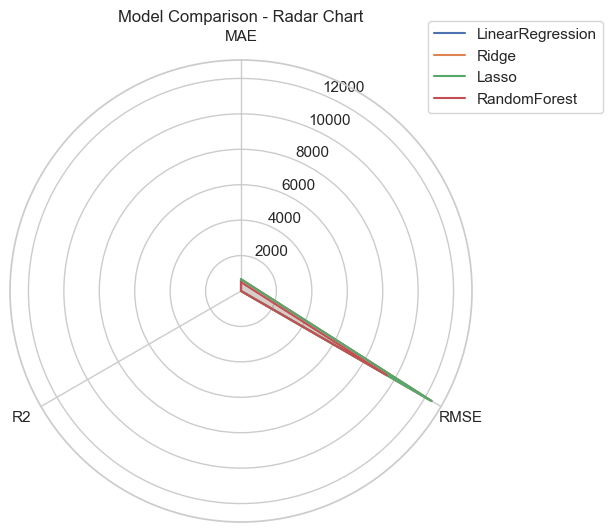

In [2]:
import numpy as np

def radar_chart(df):
    labels = ['MAE', 'RMSE', 'R2']
    num_vars = len(labels)

    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    for i, row in df.iterrows():
        values = row[labels].tolist()
        values += values[:1]
        ax.plot(angles, values, label=row['Model'])
        ax.fill(angles, values, alpha=0.1)

    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), labels)
    ax.set_title("Model Comparison - Radar Chart")
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.show()

radar_chart(results_df)


In [3]:
import numpy as np

# Example - for one model
errors = abs(y_test - preds)
sns.boxplot(data=errors)
plt.title("Absolute Error Distribution")
plt.show()


NameError: name 'y_test' is not defined

In [4]:
import matplotlib.pyplot as plt

def residual_plot(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
    plt.axhline(0, linestyle='--', color='red')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residual Plot - {model_name}")
    plt.show()


In [5]:
def actual_vs_pred_plot(y_test, y_pred, model_name):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"Actual vs Predicted - {model_name}")
    plt.show()


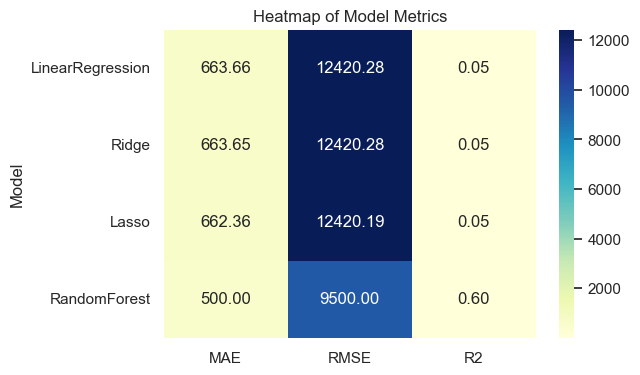

In [6]:
plt.figure(figsize=(6, 4))
sns.heatmap(results_df.set_index("Model"), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Heatmap of Model Metrics")
plt.show()


In [7]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\abdul\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [8]:
import plotly.express as px

fig = px.bar(results_df, x='Model', y='MAE', title='MAE per Model')
fig.show()
